## 1. 문제 정의(목표 설정)
- 버섯 데이터의 여러 특성들을 활용하여 독인지 식용인지를 분류해보자.
- 결정 트리 모델을 시각화 해보자
- 특성 선택(Feature Selection)을 해보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # 데이터를 랜덤하게 분리시켜주는 클래스
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류 모델 클래스

## 2. 데이터 수집, 파악하기
- csv 파일 로드
1. 데이터 로드(index 설정 안 하고)
2. 전체 컬럼, 행 숫자 파악하기
3. 데이터 타입 확인하기
4. 결측치 유무 확인하기

In [4]:
mushroom_data = pd.read_csv('data/mushroom.csv')
mushroom_data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
# 데이터 개수 총 8124개, 결측치 없음. so, 전처리 불필요
# 컬럼 23개, 데이터타입은 다 object
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 탐색적 데이터 분석
- 기술 통계
- 시각화

In [7]:
# 통계치
# 데이터가 수치형이 아니라서 4가지 밖에 없음.
# top: 해당 컬럼에서 가장 많은 수를 차지하는 유니크값
# freq: top값의 개수
mushroom_data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<Axes: xlabel='cap-surface', ylabel='count'>

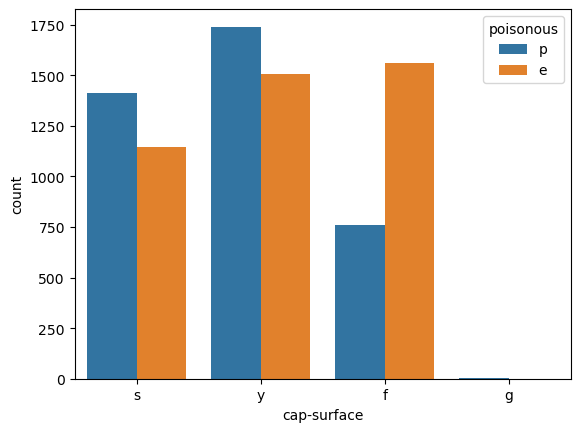

In [8]:
# counplot: bar형태로 데이터의 개수를 출력해주는 차트
sns.countplot(data = mushroom_data,
              x = 'cap-surface',
             hue = 'poisonous'
             ) # hue: 색상 지정 범위, 범례도 같이 출력

## 5. 모델링
- 문제(x), 정답(y) 분리하기

In [10]:
y = mushroom_data.loc[:,'poisonous'] # 문제
X = mushroom_data.iloc[:,1:] # 정답

In [11]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


## 인코딩
- 레이블 인코딩
  - 특정 문자 데이터를 0,1,2...순으로 정수 간격으로 매핑하는 방식
  - 간단하나 숫자의 크고 작음에 대한 특성이 작용하므로 거리나 수치 기반 모델에 적용했을 때 성능에 대한 신뢰성이 떨어질 가능성이 있음.
- 원 핫 인코딩
  - 특정 컬럼의 유니크 값에 대한 더미 컬럼들을 만들어 실제 데이터가 있는 자리에 1로 표시하고 나머지는 0으로 표시
  - 컴퓨터는 모든 데이터를 2진수로 처리하기 때문에 레이블 인코딩에 비해 기계가 직관적으로 이해하기 쉬우며 숫자의 크고 작음에 대한 특성이 없음.
  - 데이터의 유니크 값들이 많은 경우 그만큼 많은 컬럼들이 만들어져야하기 때문에 메모리 소모가 클 수 있음.

In [13]:
# 문자를 그대로 넣으면 기계가 이해를 못함. 숫자로 바꿔주는 인코딩을 해줘야함.
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [14]:
X['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [15]:
# map: key값의 데이터를 value값이랑 매치 시켜주는 함수
# 매핑 후 변수에 담아줘야 저장됨.
X['cap-shape'].map({'x':0, 'f':1,'k':2,'b':3,'s':4,'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [16]:
# label encoding 클래스도 있음.
# 한 번에 하나의 특성(1차원 하나의 컬럼)만 변환 가능!!
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder = LabelEncoder() # 레이블 인코더 객체 생성
encoder.fit(X['cap-shape']) # 레이블 인코더로 학습(레이블 인코더에게 우리 데이터의 범위를 알려주는 작업)
labels = encoder.transform(X['cap-shape']) # 학습된 인코더 객체로 실제로 수치 값으로 변환
labels

array([5, 5, 0, ..., 2, 3, 5])

In [18]:
# 인코더가 변환한 값들의 순서 확인
# 영문은 a,b,c 순서로 인덱스 번호로 변환됨.
encoder.classes_

array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object)

In [19]:
# 여러개의 컬럼을 동시에 레이블 인코딩 시키기
# 앞에서는 컬럼 하나만 가능했는데
from sklearn.compose import ColumnTransformer # 레이블 인코딩을 위한 컬럼 변환 클래스
from sklearn.preprocessing import OrdinalEncoder # 여러 개의 컬럼을 한번에 인코딩시켜주는 클래스

In [20]:
encoder2 = ColumnTransformer(
    # (인코더 이름, 인코더 객체, 컬럼들 명칭)
    transformers=[('encoder2', OrdinalEncoder(), X.columns)],
    # remainder: 변환 대상이 아닌 컬럼들을 어떻게 처리할건지에 대한 방식 지정
    # drop: 걍 제거(디폴트)
    # passthrough: 그대로 유지
    remainder = 'passthrough'
)

# fit_transform: 인코더 객체의 정보로 학습 및 변환 동시 진행
encoded_array = encoder2.fit_transform(X)
print(encoded_array)

[[5. 2. 4. ... 2. 3. 5.]
 [5. 2. 9. ... 3. 2. 1.]
 [0. 2. 8. ... 3. 2. 3.]
 ...
 [2. 2. 4. ... 0. 1. 2.]
 [3. 3. 4. ... 7. 4. 2.]
 [5. 2. 4. ... 4. 1. 2.]]


In [21]:
encoded_df = pd.DataFrame(encoded_array, columns=X.columns)
encoded_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,2.0,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,2.0,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,2.0,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,1.0,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0


## 원핫인코딩으로 해보기 

In [23]:
# 원핫인코딩은 판다스에서 지원하는 get_dummies로 진행
temp = pd.get_dummies(X[['cap-shape']], dtype=int) # dtype의 디폴트는 None
temp

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
8119,0,0,0,1,0,0
8120,0,0,0,0,0,1
8121,0,0,1,0,0,0
8122,0,0,0,1,0,0


In [24]:
# 모든 컬럼에 적용
X_one_hot = pd.get_dummies(X, dtype=int)
X_one_hot
# 유니크값들이 컬럼이 됨. X_one_hot의 컬럼 개수가 117개라는 걸 유니크값이 117개라는 뜻

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## 모델링

In [26]:
# 학습, 평가 데이터로 나누기
# train_test_split(): 데이터를 자동으로 섞어서 분리시켜주는 함
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,  # 문제 데이터프레임: 원핫인코딩 시켜준 걸로 넣어야함.
                                                    y, # 정답
                                                    test_size=0.3, # 평가 데이터의 비율(30%)
                                                    random_state=99) # 랜덤 시드값 설정

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


## 결정트리모델 불러와서 학습 및 평가

In [29]:
tree_model = DecisionTreeClassifier(max_depth=3,
                                    max_leaf_nodes=5,
                                    min_samples_leaf=50
                                   )
# 트리모델은 하이퍼파라미터를 설정하지 않으면 모든 데이터가 완전히 분류(리프노드의 불수도가 0)될 떄까지 분리함.
# so, 아무런 하이퍼파라미터 조정이 없다면 과대적합이 될 가능성이 높아짐.

In [30]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=50)

In [31]:
# 학습 데이터 정확도
tree_model.score(X_train, y_train)

0.9759057333802321

In [32]:
# 평가 데이터 정확도
tree_model.score(X_test, y_test)

0.9823625922887613

### 학습된 트리 모델 내부 구조 시각화하기
- graphviz 필요 (https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/)

In [34]:
!pip install graphviz

In [35]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [36]:
import graphviz
from sklearn.tree import export_graphviz # export_graphviz: 트리를 그리기 위한 정보를 추출해주는 함수

In [37]:
export_graphviz(tree_model,
                out_file='data/tree.dot', # 파일명 및 저장 경로 설정 (dot: 그래프에 출력될 텍스트를 담은 파일)
                class_names=['식용','독'], # 클래스 이름 설정(y_train.value_counts()로 출력되는 순서에 맞게 지정)
                feature_names=X_one_hot.columns, # 특성 명칭 지정
                impurity=True, # 지니 불순도 출력
                filled=True # 노드의 클래스별 색상 지정
                )

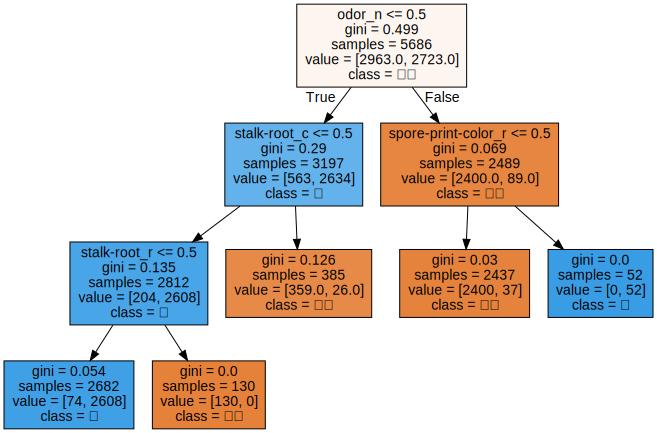

In [38]:
with open('data/tree.dot', encoding='utf8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# <= 0.5: 트리 분기 조건(해당 컬럼명의 원핫인코딩 된 데이터가 0인지 1인지 구분)
# gini: 지니불순도
# samples: 데이터 개수(min_samples_leaf=50 라고 썼기 때문에 다 50개 이상임.)
# value: 클래스별 데이터 수['식용'의 개수, '독'의 개수]
# class: 해당 노드의 예측된 class 값
# 맨 마지막 리프 노드 5개의 결과를 보면 '식용'버섯은 3종류, '독'버섯은 2종류임.

In [39]:
# 하이퍼파라미터 없이 트리모델 설정
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
tree_model2.score(X_train, y_train)

1.0

In [41]:
tree_model2.score(X_test, y_test)

1.0

In [42]:
export_graphviz(tree_model2,
                out_file='data/tree2.dot',
                class_names=['식용','독'],
                feature_names=X_one_hot.columns,
                impurity=True,
                filled=True
                )

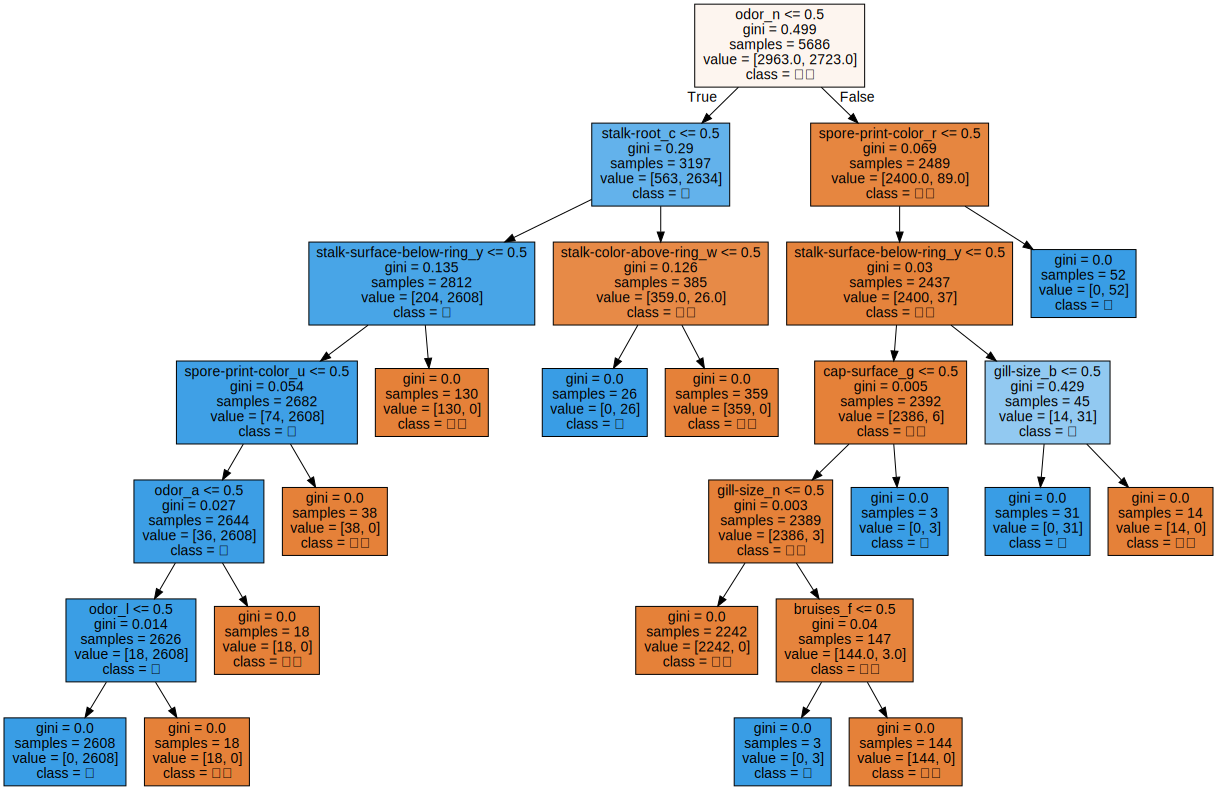

In [43]:
with open('data/tree2.dot', encoding='utf8') as f:
    dot_graph2 = f.read()
display(graphviz.Source(dot_graph2))
# 마지막 리프노드를 보면 values [,0]이런 식임.

### max_depth의 변경에 딸 train, test 데이터의 정확도가 어떻게 바뀌는지 시각화 해보기

In [82]:
# train과 test 정확도를 담아줄 리스트 생성
train_list, test_list = [], []

for i in range(1, 11):
    # 모델 생성
    tree_model3 = DecisionTreeClassifier(max_depth=i)
    # 모델 학습
    tree_model3.fit(X_train, y_train)
    
    # train 정확도를 리스트에 담기
    train_score = tree_model3.score(X_train, y_train)
    train_list.append(train_score)
    
    # test 정확도를 리스트에 담기
    test_score = tree_model3.score(X_test, y_test)
    test_list.append(test_score)

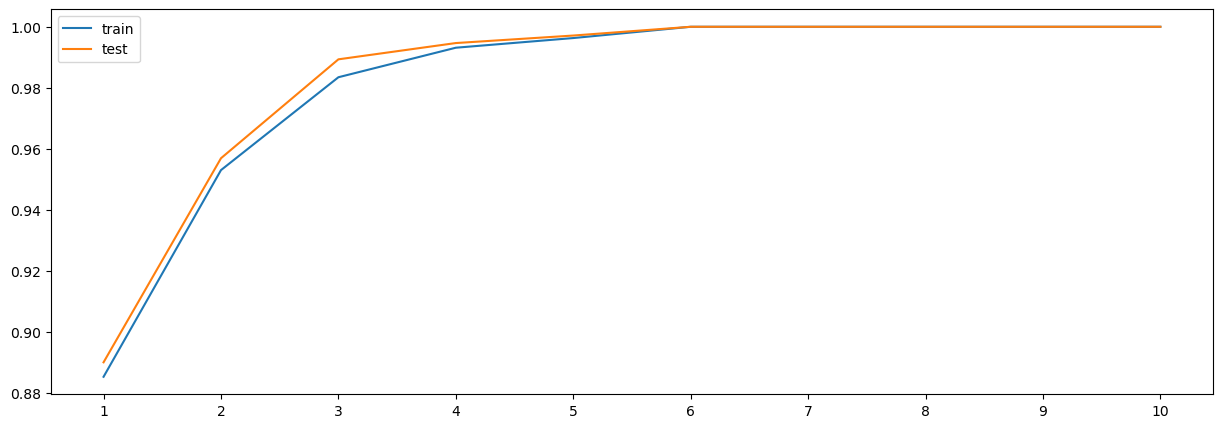

In [86]:
plt.figure(figsize=(15,5))
# max_depth가 1부터 시작해서 x축 표기값을 1부터 출력되게 설정
plt.plot(range(1,11), train_list, label = 'train')
plt.plot(range(1,11), test_list, label = 'test')
plt.xticks(range(1,11))
plt.legend()

### 특성 선택(Feature selection)
- 모델이 정답을 예측함에 있어서 문제 데이터의 특성들의 중요도를 수치로 출력할 수 있음(해당 특성이 정답 예측에 얼마만큼 기여했나)
- 각 특성들은 0~1사이의 중요도 값을 가지며 모든 특성의 중요도의 합은 1이 됨.
- 0이 나오는 특성은 모델이 정답을 예측하는데 전혀 도움이 되지 않은 특성
- 1은 완벽하게 정답을 예측해내는 특성
- 1이 나오는 특성이 있다면 모델이 정답을 예측함에 있어서 해당 특성 하나로만 판단했다는 뜻(즉, 다른 특성은 예측에 필요없게 됨.)

In [89]:
# 학습된 트리 모델에서 특성의 중요도 출력하기
fi = tree_model2.feature_importances_
fi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10626189e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.07106617e-03, 0.00000000e+00, 1.24267931e-02, 0.00000000e+00,
       0.00000000e+00, 1.25983286e-02, 0.00000000e+00, 6.12625483e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.79680450e-03,
       4.04922767e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.76473048e-01, 0.00000000e+00, 0.00000000e+00,
      

In [91]:
len(fi)

117

In [95]:
X_one_hot.columns # 특성 중요도의 출력 순서와 컬럼명의 출력 순서는 동일

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [97]:
# fi를 보기 좋게 데이터프레임으로 변환
fi_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])
fi_df

,특성중요도
cap-shape_b,0.0
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [99]:
fi_df.sort_values(by='특성중요도', ascending=False, inplace=True)
fi_df

,특성중요도
odor_n,0.612625
stalk-root_c,0.176473
stalk-surface-below-ring_y,0.097290
spore-print-color_r,0.034799
spore-print-color_u,0.025687
...,...
gill-color_h,0.000000
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000


### 정리
- tree 모델 내부 시각화 표를 보면 가장 중요도가 높은 컬럼인 odor_n을 가장 먼저 고려해서 분류한 것을 알 수 있음.
- tree 모델은 중요도가 가장 높은(정답을 예측하는데 가장 중요한) 특성을 먼저 고려해야 가장 효율적으로 분류할 수 있음.
- 현재 데이터는 학습용 데이터로 odor_n컬럼이 60% 이상의 중요도를 혼자 차지하고 있었기 때문에 분류 패턴과 규칙을 찾기 쉬웠음. 그래서 100%의 정확도를 얻어낼 수 있었음.